<a href="https://colab.research.google.com/github/SaashaJoshi/Pancreas-Cancer/blob/master/Denoising_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 3.9MB 51.8MB/s 
     |████████████████████████████████| 450kB 54.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=7ea293d085ae18c1a8ec9427ba8cee1887291d5e7502d0b7aac138108bf26aca
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflo

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import sys
import cv2
import random
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from glob import glob

In [0]:
data_path = 'drive/My Drive/pancreas_data_original/train_images'
output_path = working_path = 'drive/My Drive/'
g = glob(data_path + '/*.png')

# Print out the first 5 file names to verify we're in the right folder.
print ("Total of %d images.\nFirst 5 filenames:" % len(g))
print ('\n'.join(g[:5]))

Total of 39 images.
First 5 filenames:
drive/My Drive/pancreas_data_original/train_images/000149.png
drive/My Drive/pancreas_data_original/train_images/000150.png
drive/My Drive/pancreas_data_original/train_images/000148.png
drive/My Drive/pancreas_data_original/train_images/000145.png
drive/My Drive/pancreas_data_original/train_images/000143.png


In [0]:
from PIL import Image
import os
import tensorflow as tf
import numpy as np
from matplotlib.pyplot import imshow

# name = "image"
# path = os.curdir + "/datasetfinal/"+ name

test_dir = 'drive/My Drive/pancreas_data_original/test_images'
train_dir = 'drive/My Drive/pancreas_data_original/train_images'

new_path = 'drive/My Drive/pancreas_data_original/converted_train_images'
if not os.path.exists(new_path):
    os.makedirs(d)

['000149.png', '000150.png', '000148.png', '000145.png', '000143.png', '000144.png', '000141.png', '000140.png', '000134.png', '000137.png', '000135.png', '000132.png', '000131.png', '000130.png', '000129.png', '000127.png', '000124.png', '000125.png', '000123.png', '000117.png', '000126.png', '000118.png', '000116.png', '000119.png', '000115.png', '000113.png', '000114.png', '000112.png', '000110.png', '000111.png', '000109.png', '000105.png', '000108.png', '000103.png', '000101.png', '000104.png', '000102.png', '000100.png', '000146.png']


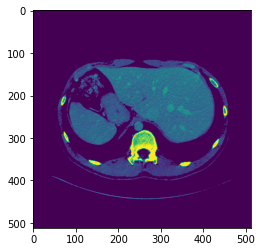

In [0]:
dirs = os.listdir(train_dir)
print(dirs)

for f in dirs:
  full_new_path = os.path.join(new_path, f)
  fullpath = os.path.join(train_dir,f) 
  if os.path.isfile(fullpath):    # os.path.isfile returns boolean value whether file exists or not
    img=Image.open(fullpath)    # opens and identifies given image file
    pixels = img.load()         # image data collected in Image.open is read here and loads pixel data
    img_convert = img.convert('L')      # returns converted copy of image
    imshow(img_convert)
    img_convert.save(full_new_path)        # saves image under given filename

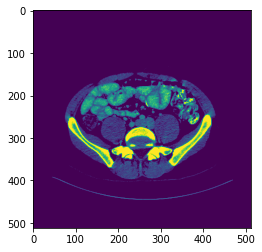

In [0]:
# Verify images in new_path
for f in os.listdir(new_path):
  full_new_path = os.path.join(new_path, f)
  img = Image.open(full_new_path)
  imshow(img)

In [0]:
noise_factor = 10

def gauss_noise_gen(path, noise_factor = 10):
  for f in os.listdir(path):
    full_new_path = os.path.join(new_path, f)
    img = Image.open(full_new_path)
    # for batch_x, batch_y in batches:
    # Generate Gaussian noise
    sigma = np.random.exponential(0.15)
    gauss = np.random.normal(loc = 0, scale = sigma, size = img.size)     # loc = mean, scale = standard deviation
    noise = noise_factor * gauss
    img_gauss = img + noise
    # img_gauss.save(full_new_path)
    return img_gauss

# X_train = new_path
X_noisy = gauss_noise_gen(new_path, 10)
# print(X_train_noisy)
# print(X_train.shape)
# print(X_train_noisy.shape)
    
    # batch_noisy = batch_x + noise
    # gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
    # Add Gaussian noise to the image
    # imshow(img_gauss)
    # yield (batch_noisy, batch_y)

# def poisson_noise_gen(noise_factor):
#   for f in os.listdir(new_path):
  #   full_new_path = os.path.join(new_path, f)
  #   img = Image.open(full_new_path)
  #   # Generate Gaussian noise
  #   sigma = np.random.exponential(0.15)
  #   poi = np.random.poisson(loc = 0, scale = sigma, size = img.size)     # loc = mean, scale = standard deviation
  #   noise = noise_factor * poi
  #   # gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
  #   # Add Gaussian noise to the image
  #   img_poi = img + noise

In [0]:
from keras.preprocessing.image import load_img, array_to_img, img_to_array
X = []
Y = []

# Noisy Images
for img in os.listdir(new_path):
  full_new_path = os.path.join(new_path, img)
  img = load_img(full_new_path, grayscale=True,target_size=(512, 512))
  img = img_to_array(img).astype('float32')/255.
  X.append(img)

# Clean Images
for img in os.listdir(train_dir):
  full_path = os.path.join(train_dir, img)
  img = load_img(full_path, grayscale=True,target_size=(512, 512))
  img = img_to_array(img).astype('float32')/255.
  Y.append(img)

X = np.array(X)
Y = np.array(Y)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (39, 512, 512, 1)
Size of Y :  (39, 512, 512, 1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, _, Y_train, _ = train_test_split(X, Y, test_size=0.1, random_state=111)

In [0]:
# from keras.preprocessing.image import ImageDataGenerator

# data_gen_args = dict()
# #     featurewise_center=True,
# #     featurewise_std_normalization=True,
#     # rotation_range=20,
#     # width_shift_range=0.2,
#     # height_shift_range=0.2,
#     # brightness_range=[0.5, 1.2],
#     # shear_range=0.01,
#     # horizontal_flip=True,
#     # rescale=1/255,
#     # fill_mode='reflect',
#     # data_format='channels_last')

# data_flow_args = dict(
#     target_size = (512, 512),
#     batch_size = 10,
#     class_mode = 'input')

In [0]:
from tensorflow import keras
import keras.layers as layers
import keras.models as models
from keras.initializers import orthogonal

def Conv2DLayer(x, filters, kernal, strides, padding, block_id, kernel_init = orthogonal()):
  prefix = f'block_{block_id}_'
  x = layers.Conv2D(filters, kernel_size = kernal, strides = strides, padding = padding, kernel_initializer = kernel_init, name = prefix + 'conv')(x)
  x = layers.LeakyReLU(name = prefix + 'lrelu')(x)
  x = layers.Dropout(0.2, name = prefix + 'drop')(x)
  x = layers.BatchNormalization(name = prefix + 'conv_bn')

def Transpose_Conv2DLayer(x, filters, kernal, strides, padding, block_id, kernel_init = orthogonal()):
  prefix = f'block: {block_id}'
  x = layers.Conv2DTranspose(filters, kernel_size = kernal, strides = strides, padding = padding, kernel_initializer = kernel_init, name = prefix + 'de-conv')(x)
  x = layers.LeakyReLU(name = prefix + 'lrelu')(x)
  x = layers.Dropout(0.2, name = prefix + 'drop')((x))
  x = layers.BatchNormalization(name = prefix + 'conv_bn')(x)

In [0]:
def Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
  prefix = f'block_{block_id}_'
  x = layers.Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,
                    kernel_initializer=kernel_init, name=prefix+'conv')(x)
  x = layers.LeakyReLU(name=prefix+'lrelu')(x)
  x = layers.Dropout(0.2, name=prefix+'drop')((x))
  x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
  return x

def Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
  prefix = f'block_{block_id}_'
  x = layers.Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,
                              kernel_initializer=kernel_init, name=prefix+'de-conv')(x)
  x = layers.LeakyReLU(name=prefix+'lrelu')(x)
  x = layers.Dropout(0.2, name=prefix+'drop')((x))
  x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
  return x

from keras.optimizers import SGD, Adam

def AutoEncoder():
  inputs = layers.Input(shape=(512, 512, 1), name='image_input')
                          
  # 256 x 256
  conv1 = Conv2DLayer(inputs, 64, 3, strides=1, padding='same', block_id=1)
  conv2 = Conv2DLayer(conv1, 64, 3, strides=2, padding='same', block_id=2)
  
  # 128 x 128
  conv3 = Conv2DLayer(conv2, 128, 5, strides=2, padding='same', block_id=3)
  
  # 64 x 64
  conv4 = Conv2DLayer(conv3, 128, 3, strides=1, padding='same', block_id=4)
  conv5 = Conv2DLayer(conv4, 256, 5, strides=2, padding='same', block_id=5)
  
  # 32 x 32
  conv6 = Conv2DLayer(conv5, 512, 3, strides=2, padding='same', block_id=6)
  
  # 16 x 16
  deconv1 = Transpose_Conv2D(conv6, 512, 3, strides=2, padding='same', block_id=7)
  
  # 32 x 32
  skip1 = layers.concatenate([deconv1, conv5], name='skip1')
  conv7 = Conv2DLayer(skip1, 256, 3, strides=1, padding='same', block_id=8)
  deconv2 = Transpose_Conv2D(conv7, 128, 3, strides=2, padding='same', block_id=9)
  
  # 64 x 64
  skip2 = layers.concatenate([deconv2, conv3], name='skip2')
  conv8 = Conv2DLayer(skip2, 128, 5, strides=1, padding='same', block_id=10)
  deconv3 = Transpose_Conv2D(conv8, 64, 3, strides=2, padding='same', block_id=11)
  
  # 128 x 128
  skip3 = layers.concatenate([deconv3, conv2], name='skip3')
  conv9 = Conv2DLayer(skip3, 64, 5, strides=1, padding='same', block_id=12)
  deconv4 = Transpose_Conv2D(conv9, 64, 3, strides=2, padding='same', block_id=13)
  
  # 256 x 256
  skip3 = layers.concatenate([deconv4, conv1])
  conv10 = layers.Conv2D(1, 3, strides=1, padding='same', activation='sigmoid', kernel_initializer=orthogonal(), name='final_conv')(skip3)

  model = models.Model(inputs=inputs, outputs=conv10)
  model.compile(optimizer = Adam(lr = 0.002), loss = 'mse', metrics = ['accuracy'])
  
  return model


  # inputs = layers.Input(shape = (512, 512, 3), name='image_input')

  # # 256*256
  # conv1 = Conv2DLayer(inputs, 64, 3, strides = 1, padding = 'same', block_id = 1)
  # conv2 = Conv2DLayer(conv1, 64, 3, strides = 2, padding = 'same', block_id = 2)

  # # 128*128
  # conv3 = Conv2DLayer(conv2, 128, 5, strides = 2, padding = 'same', block_id = 1)

  # # 64*64
  # conv4 = Conv2DLayer(conv3, 128, 3, strides = 1, padding = 'same', block_id = 4)
  # conv5 = Conv2DLayer(conv4, 256, 5, strides = 2, padding = 'same', block_id = 5)

  # # 32*32
  # conv6 = Conv2DLayer(conv5, 512, 3, strides = 2, padding = 'same', block_id = 6)

  # # 16*16
  # deconv1 = Transpose_Conv2D(conv6, 512, 3, strides = 2, padding = 'same', block_id = 7)

  # # 32*322
  # skip1 = layers.concatenate([deconv1, conv5], name = 'skip1')
  # conv7 = Conv2DLayer(skip1, 256, 3, strides = 1, padding = 'same', block_id = 8)
  # deconv2 = Transpose_Conv2D(conv7, 128, 3, strides = 2, padding = 'same', block_id = 9)

  # # 64*64
  # skip2 = layers.concatenate([deconv2, conv3], name = 'skip2')
  # conv8 = Conv2DLayer(skip2, 128, 5, strides = 1, padding = 'same', block_id = 10)
  # deconv3 = Transpose_Conv2D(conv8, 64, 3, strides = 2, padding = 'same', block_id = 11)

  # # 128*128
  # skip3 = layers.concatenate([deconv3, conv2], name = 'skip3')
  # conv9 = Conv2DLayer(skip3, 64, 5, strides = 1, padding = 'same', block_id = 12)
  # deconv4 = Transpose_Conv2D(conv9, 64, 3, strides = 2, padding = 'same', block_id = 13)

  # # 256*256
  # skip4 = layers.concatenate([deconv4, conv1])
  # conv10 = layers.Conv2D(3, 3, strides = 1, padding = 'same', activation = 'sigmoid', kernel_initializer = orthogonal(), name ='final_conv')(skip3)

  # outputs = conv10

  # return models.Model(inputs = inputs, outputs = outputs)

In [0]:
model = AutoEncoder()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
block_1_conv (Conv2D)           (None, 512, 512, 64) 640         image_input[0][0]                
__________________________________________________________________________________________________
block_1_lrelu (LeakyReLU)       (None, 512, 512, 64) 0           block_1_conv[0][0]               
__________________________________________________________________________________________________
block_1_drop (Dropout)          (None, 512, 512, 64) 0           block_1_lrelu[0][0]              
____________________________________________________________________________________________

In [0]:
# train_datagen = ImageDataGenerator()

# train_batches = train_datagen.flow_from_directory(new_path , target_size = (512, 512), batch_size = 10, class_mode = 'input')
# train_noisy_batches = gauss_noise_gen(train_batches, 10)
# noisy_images_train = gauss_noise_gen() 

In [0]:
# model.fit(train_noisy, 
#           steps_per_epoch = train_batches.samples // batch_size,
#           epochs = 10,
#           verbose=1, 
#           validation_data = val_noisy_batches,
#           validation_steps = train_batches.samples // batch_size,)

model.fit(X_train, Y_train, epochs = 10, batch_size = 8)

Epoch 1/10
35/35 [==============================] - 5s 148ms/step - loss: 0.1537 - accuracy: 0.6760
Epoch 2/10
35/35 [==============================] - 3s 84ms/step - loss: 0.0837 - accuracy: 0.7587
Epoch 3/10
35/35 [==============================] - 3s 84ms/step - loss: 0.0666 - accuracy: 0.7639
Epoch 4/10
35/35 [==============================] - 3s 84ms/step - loss: 0.0544 - accuracy: 0.7771
Epoch 5/10
35/35 [==============================] - 3s 84ms/step - loss: 0.0473 - accuracy: 0.7805
Epoch 6/10
35/35 [==============================] - 3s 84ms/step - loss: 0.0405 - accuracy: 0.7841
Epoch 7/10
35/35 [==============================] - 3s 84ms/step - loss: 0.0358 - accuracy: 0.7860
Epoch 8/10
35/35 [==============================] - 3s 84ms/step - loss: 0.0327 - accuracy: 0.7877
Epoch 9/10
35/35 [==============================] - 3s 84ms/step - loss: 0.0304 - accuracy: 0.7882
Epoch 10/10
35/35 [==============================] - 3s 84ms/step - loss: 0.0310 - accuracy: 0.7891


In [0]:
test_noisy = gauss_noise_gen(train_dir, 10)
noisy = []
# Noisy Images
for img in os.listdir(new_path):
  full_new_path = os.path.join(new_path, img)
  img = load_img(full_new_path, grayscale=True,target_size=(512, 512))
  img = img_to_array(img).astype('float32')/255.
  noisy.append(img)
noisy = np.array(noisy)
print(noisy.shape)
# X, Y = next(test_noisy)

# score = model.evaluate(test_noisy, verbose=1)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

model.predict(noisy)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(39, 512, 512, 1)


ResourceExhaustedError: ignored

In [0]:
# # test_noisy = gauss_noise_gen(train_dir, 10)
# sample_test = load_img(X_train, target_size=(512, 512))
# sample_test = img_to_array(sample_test)
# sample_test_img = sample_test.astype('float32')/255.
# sample_test_img = np.expand_dims(sample_test, axis=0)

# # Get the predition
# predicted_label = np.squeeze(autoencoder.predict(sample_test_img))

# f, ax = plt.subplots(1,2, figsize=(10,8))
# ax[0].imshow(np.squeeze(sample_test), cmap='gray')
# ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
# plt.show()

AttributeError: ignored

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


AttributeError: ignored

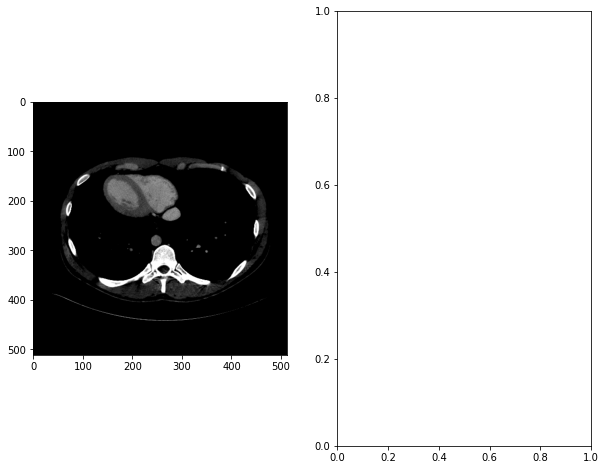

In [0]:
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(X_train[10]), cmap='gray')
sample_test = load_img(X_train, grayscale=True, target_size=(512, 512))
sample_test = img_to_array(X_train)
sample_test_img = sample_test.astype('float32')/255.
sample_test_img = np.expand_dims(sample_test, axis=0)
predicted_label = np.squeeze(AutoEncoder.predict(sample_test_image))
ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
plt.show()